## COVID19 Data Analysis Using Python
## Cousera Project Network
### Data Mining and Machine Learning Instructor:Ahmad Varasteh
### Date: 06/06/2020

#### Import all the libraries needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
import sys

### Importing the dataset

In [2]:
corona_dataset_csv = pd.read_csv('covid19_Confirmed_dataset.csv')
corona_dataset_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


### Let's check the shape of the dataframe

In [3]:
corona_dataset_csv.shape

(266, 104)

Lattitude and Longitude is not really needed in this analysis so we are going to drop it.

In [4]:
df = corona_dataset_csv.drop(["Lat","Long"],axis=1)

In [5]:
df.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


### Aggregating the rows by the country

In [6]:
df_aggregate = df.groupby("Country/Region").sum()

In [7]:
df_aggregate.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
df_aggregate.shape

(187, 100)

### Visualizing data related to countries

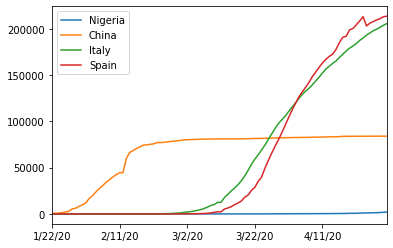

In [9]:
df_aggregate.loc["Nigeria"].plot()
df_aggregate.loc["China"].plot()
df_aggregate.loc["Italy"].plot()
df_aggregate.loc["Spain"].plot()
plt.legend()
plt.show()

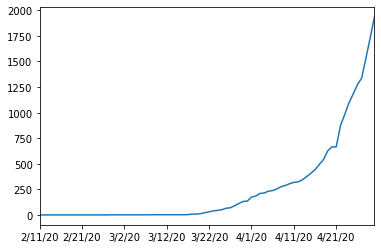

In [10]:
df_aggregate.loc["Nigeria"][20:].plot()
plt.show()

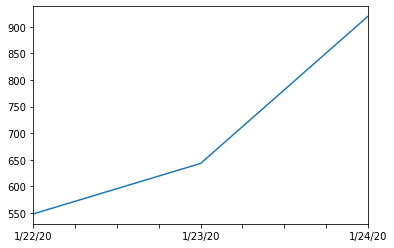

In [11]:
df_aggregate.loc["China"][:3].plot()
plt.show()


### Calculate In daily Infection rate
 This is done by calculating the first derivative of the curve

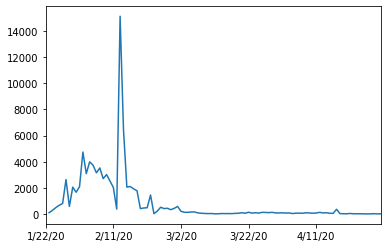

In [12]:
df_aggregate.loc["China"].diff().plot()
plt.show()

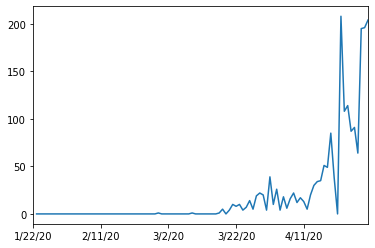

In [13]:
df_aggregate.loc["Nigeria"].diff().plot()
plt.show()

### Find maxmimum infection rate for China

In [14]:
df_aggregate.loc["China"].diff().max()

15136.0

In [15]:
df_aggregate.loc["Nigeria"].diff().max()

208.0

In [16]:
df_aggregate.loc["Italy"].diff().max()

6557.0

In [17]:
df_aggregate.loc["Spain"].diff().max()

9630.0

### Find maximum infection rate for all of the countries

In [18]:
countries = list(df_aggregate.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(df_aggregate.loc[c].diff().max())
df_aggregate["max_infection_rates"]=max_infection_rates

In [19]:
df_aggregate.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,24,24,24,24,24,6.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,3144,3435,3607,3780,3892,4003,4127,4285,4428,291.0
Armenia,0,0,0,0,0,0,0,0,0,0,...,1473,1523,1596,1677,1746,1808,1867,1932,2066,134.0
Australia,0,0,0,0,4,5,5,6,9,9,...,6652,6662,6677,6694,6714,6721,6744,6752,6766,497.0


### Create a new Dataframe for the maximum infection rates

In [20]:
corona_data = pd.DataFrame(df_aggregate["max_infection_rates"])
corona_data.head(10)

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
Antigua and Barbuda,6.0
Argentina,291.0
Armenia,134.0
Australia,497.0


### Importing the second dataset

In [21]:
world_happiness_report = pd.read_csv("worldwide_happiness_report.csv")
world_happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [22]:
world_happiness_report.shape

(156, 9)

### Drop the columns that are not needed

In [23]:
columns_to_dropped = ['Overall rank','Score','Generosity','Perceptions of corruption']
world_happiness_report.drop(columns_to_dropped,axis=1 , inplace=True)

In [24]:
world_happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Set the index of the dataframe to 'Country or region' so as to match the other Dataset

In [25]:
world_happiness_report.set_index(['Country or region'],inplace=True)
world_happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


#### Combine/join the two dataset

In [ ]:
data = world_happiness_report.join(corona_data).copy()
data.head()

In [27]:
data.shape

(156, 5)

#### The Correlation of the Data

In [28]:
data.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_infection_rates
GDP per capita,1.000000,0.754906,0.835462,0.379079,0.250118
Social support,0.754906,1.000000,0.719009,0.447333,0.191958
Healthy life expectancy,0.835462,0.719009,1.000000,0.390395,0.289263
Freedom to make life choices,0.379079,0.447333,0.390395,1.000000,0.078196
max_infection_rates,0.250118,0.191958,0.289263,0.078196,1.000000


### Visualize
#### Plot Maxium infection rate against the Other Features

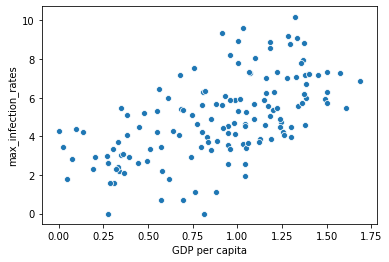

In [29]:
x = data['GDP per capita']
y = data['max_infection_rates']
sns.scatterplot(x,np.log(y))
plt.show()

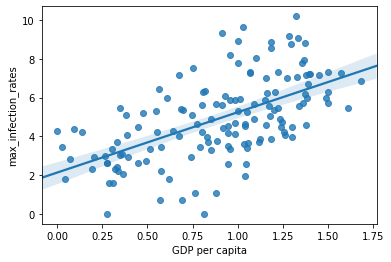

In [30]:
sns.regplot(x,np.log(y))
plt.show()

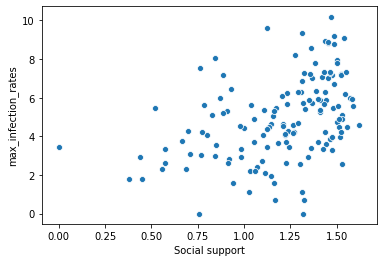

In [31]:
x = data['Social support']
y = data['max_infection_rates']
sns.scatterplot(x,np.log(y))
plt.show()

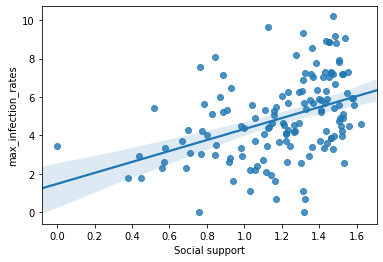

In [32]:
sns.regplot(x,np.log(y))
plt.show()

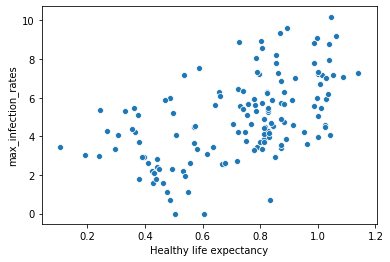

In [33]:
x = data['Healthy life expectancy']
y = data['max_infection_rates']
sns.scatterplot(x,np.log(y))
plt.show()

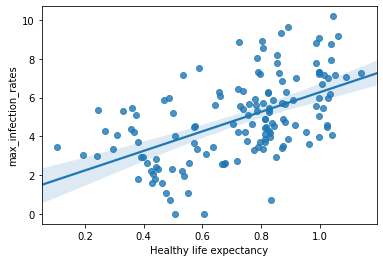

In [34]:
sns.regplot(x,np.log(y))
plt.show()

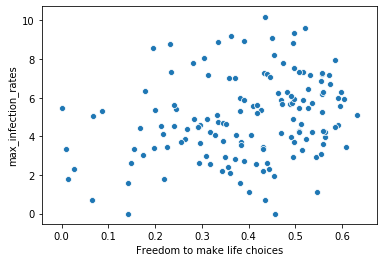

In [35]:
x = data['Freedom to make life choices']
y = data['max_infection_rates']
sns.scatterplot(x,np.log(y))
plt.show()

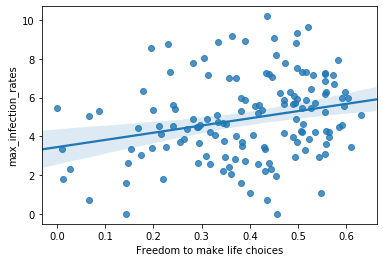

In [36]:
sns.regplot(x,np.log(y))
plt.show()